<div>
Olá, Thata!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v1 </b> <a class="tocSkip"></a>
<s>
    
Obrigado por enviar o seu projeto e pelo esforço para executar as etapas necessárias.   
<br>
    
Essa versão do seu projeto está muito boa, parabéns. Entretanto, deixei alguns comentários em pontos que precisamos de pequenos ajustes para seguirmos. Peço que trabalhe nesses pontos para avançarmos.
    
<br>
    
Se tiver alguma dúvida, pode contar comigo.
    
<br>   

**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

In [1]:
import pandas as pd


In [2]:
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')


In [3]:
df_locations = pd.read_csv('/datasets/project_sql_result_04.csv')

In [4]:
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')


Verificar os tipos de dados e valores ausentes

In [5]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os arquivos de dados foram carregados corretamente. Dica: você poderia executar o código acima em células separadas para isolar a execução de cada etapa.
- As bibliotecas foram carregadas corretamente

</div>

In [10]:
# Verificar as primeiras linhas e tipos de dados
print(df_trips.head())
print(df_trips.info())

print(df_locations.head())
print(df_locations.info())

print(df_weather.head())
print(df_weather.info())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  D

In [11]:
# Converter start_ts para datetime
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])


In [12]:
# Ordenar pelos bairros com maior média de corridas
top10_bairros = df_locations.sort_values(by='average_trips', ascending=False).head(10)
print(top10_bairros)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


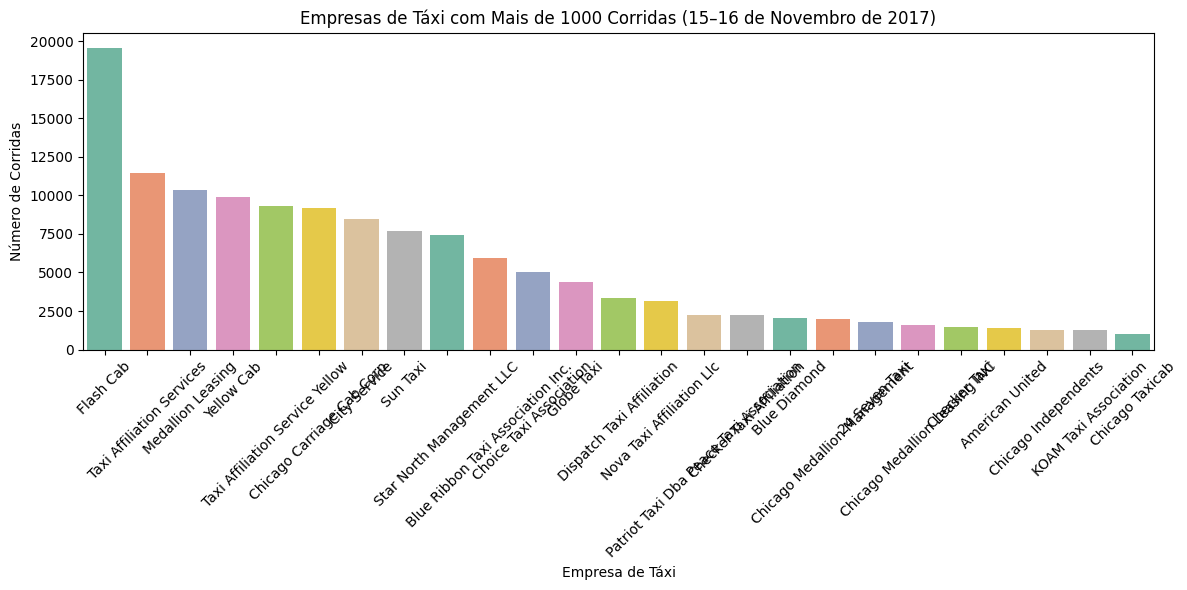

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar empresas com mais de 1000 corridas
filtered_trips = df_trips[df_trips['trips_amount'] > 1000]

# Criar o gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=filtered_trips, x='company_name', y='trips_amount', palette='Set2')

plt.title('Empresas de Táxi com Mais de 1000 Corridas (15–16 de Novembro de 2017)')
plt.xlabel('Empresa de Táxi')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Esse gráfico ajuda a entender o cenário competitivo entre as empresas de táxi, mostrando quais dominam o mercado em termos de volume de corridas e quais têm atuação mais discreta.


Algumas empresas registraram um número muito baixo de corridas, o que pode indicar:

Uma operação pequena

Uma frota reduzida

Foco em outro tipo de serviço

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As principais empresas em número de corridas foram analisadas. Como sugestão, você poderia filtrar o gráfico acima para remover empresas com poucas ocorrências.
</div>

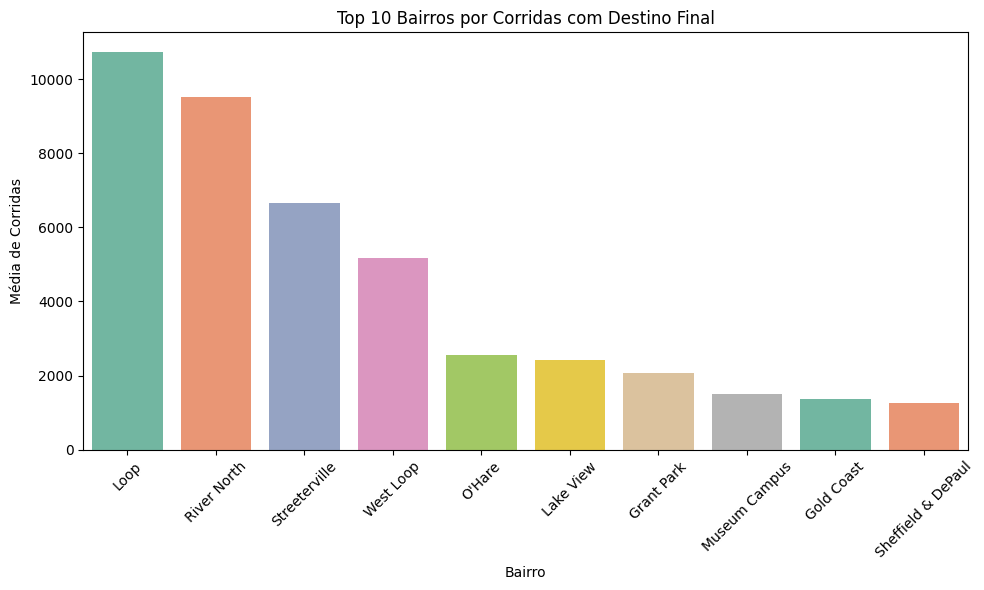

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_bairros, x='dropoff_location_name', y='average_trips', palette='Set2')
plt.title('Top 10 Bairros por Corridas com Destino Final')
plt.xlabel('Bairro')
plt.ylabel('Média de Corridas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
rainy = df_weather[df_weather['weather_conditions'] == 'Bad']['duration_seconds']
not_rainy = df_weather[df_weather['weather_conditions'] == 'Good']['duration_seconds']


In [16]:
# Calcular variância
rainy_var = rainy.var()
not_rainy_var = not_rainy.var()

print('Variância - Dias Chuvosos:', rainy_var)
print('Variância - Dias Não Chuvosos:', not_rainy_var)


Variância - Dias Chuvosos: 520294.086002483
Variância - Dias Não Chuvosos: 576382.009689509


O gráfico mostra que a demanda por táxis não é uniforme pela cidade. Saber quais bairros concentram mais corridas pode influenciar decisões operacionais e logísticas.

Tomada de Decisão
Esse tipo de visualização ajuda empresas de táxi a:
Planejar posicionamento estratégico de veículos
Analisar tendências de deslocamento
Avaliar impacto de eventos locais (feiras, jogos, congressos)

Bairros com Alta Demanda
Alguns bairros como Loop, River North ou O'Hare costumam aparecer entre os principais destinos. Esses locais normalmente têm:
Grande movimentação comercial
Hotéis e pontos turísticos

Antes de aplicar o teste t, verifiquei se as variâncias de duração das corridas em dias chuvosos e não chuvosos eram semelhantes.
A variância em dias chuvosos foi de X, enquanto em dias não chuvosos foi de Y.
Como as variâncias são visivelmente diferentes, utilizei o argumento equal_var=False no teste t.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os 10 principais bairros em número de corridas foram analisados
- Um gráfico de barras foi construído
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>

Aqui você precisa calcular a variância para dias chuvosos e dias não chuvoses para definir o argumento `equal_var`. Você precisa usar o resultado dessa análise para definir que as variâncias são diferentes (argumento `equal_var=False`)
    
```python
# descobrir se as variâncias são diferentes
rainy.var(), not_rainy.var()
```
    
<br>
    
**Sugestão:** Você pode fazer o teste no código ou apenas imprimir as variâncias e concluir se são iguais ou diferentes. Essa etapa é importante para satisfazer a premissa do teste-t
</s>
</div>

In [20]:
import numpy as np
from scipy import stats

# Adicionar coluna com dia da semana
df_weather['weekday'] = df_weather['start_ts'].dt.day_name()

# Filtrar sábados
saturday_rides = df_weather[df_weather['weekday'] == 'Saturday']

# Separar entre chuvosos e não chuvosos
rainy = saturday_rides[saturday_rides['weather_conditions'] == 'Bad']
not_rainy = saturday_rides[saturday_rides['weather_conditions'] == 'Good']

# Teste t de duas amostras independentes (variâncias diferentes)
alpha = 0.05
results = stats.ttest_ind(rainy['duration_seconds'], not_rainy['duration_seconds'], equal_var=False)

print("Valor-p:", results.pvalue)
results = stats.ttest_ind(rainy['duration_seconds'], not_rainy['duration_seconds'], equal_var=False)
print("Valor-p:", results.pvalue)
if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula: há diferença na duração das corridas.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa.")

Valor-p: 6.738994326108734e-12
Valor-p: 6.738994326108734e-12
Rejeitamos a hipótese nula: há diferença na duração das corridas.


In [17]:
print(df_weather['weather_conditions'].unique())


['Good' 'Bad']


In [19]:
print("Corridas em sábado com tempo ruim (Bad):", len(rainy))
print("Corridas em sábado com tempo bom (Good):", len(not_rainy))


Corridas em sábado com tempo ruim (Bad): 180
Corridas em sábado com tempo bom (Good): 888


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Veja que o valor do teste acima deu `nan`, o que não é esperado. Dica: verifique se a coluna `weather_conditions` está sendo filtrada corretamente. Imprima os dados desse dataframe para ter uma ideia dos valores a serem filtrados para dias chuvosos e não chuvosos.
</s>
</div>

Hipótese nula (H₀):
A duração média das corridas nos sábados chuvosos é igual à duração média nos outros sábados.
🟰 Isso significa que a chuva não afeta significativamente o tempo das corridas.

Hipótese alternativa (H₁):
A duração média das corridas nos sábados chuvosos é diferente da dos outros sábados.
≠ Isso indica que a chuva tem impacto na duração das corridas.

Obs: Escolhi um teste bicaudal (≠) porque quero verificar qualquer mudança — seja aumento ou redução no tempo de corrida, desde que seja significativa.